In [128]:
# Import the dependencies.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [129]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [130]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [131]:
coordinates

 (78.9737985050086, -120.7547866055182),
 (-9.245252219202982, -121.0479312058195),
 (48.13435522790627, 46.32684546735763),
 (26.062540445734015, -146.64884910865788),
 (-66.89575424462255, -18.13523478859082),
 (17.841128312700135, 22.45752928972462),
 (51.55477148929734, 141.54596441753648),
 (42.038117138516924, 1.0852137831643631),
 (4.494645197860649, 9.145927337810349),
 (-85.39000916126739, -39.22831938511712),
 (1.5515639472838814, 88.98567134963997),
 (35.67002774519709, -150.59997714668376),
 (-27.104075103390116, -39.00821868502186),
 (30.199238122261008, -61.065297916384694),
 (-79.15713571082897, 146.3635779058245),
 (76.33043281371985, -89.8322200814271),
 (82.09393831051662, -77.5335439435776),
 (-31.418976453433622, 10.369855312426438),
 (-24.091474471997998, -127.8781736609157),
 (7.515467052240268, -170.2687384767722),
 (-57.31528941598578, -152.94315947006623),
 (32.544573715882294, 57.49289169090193),
 (-88.70663493880579, 47.91555069113801),
 (46.381357972153666, 

In [132]:
from citipy import citipy

In [133]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ushuaia ar
taolanaro mg
kijang id
sao joao da barra br
iqaluit ca
rabak sd
mataura pf
mogadishu so
alice springs au
yellowknife ca
port alfred za
vila velha br
chokurdakh ru
butaritari ki
rikitea pf
rikitea pf
puerto del rosario es
lebu cl
kambove cd
atuona pf
ushuaia ar
san patricio mx
isangel vu
taltal cl
kabelvag no
busselton au
palmares do sul br
mataura pf
punta arenas cl
taolanaro mg
taolanaro mg
port elizabeth za
thompson ca
ushuaia ar
davila ph
hit iq
stykkisholmur is
new norfolk au
lucea jm
daru pg
peace river ca
shimoda jp
doctor pedro p. pena py
tuktoyaktuk ca
nikolskoye ru
san sebastian co
nikolskoye ru
kaeo nz
swan river ca
mataura pf
tiksi ru
ust-omchug ru
bluff nz
rikitea pf
bluff nz
maykain kz
victoria sc
muscat om
attawapiskat ca
lavrentiya ru
hilo us
ushuaia ar
chokurdakh ru
mys shmidta ru
puerto ayora ec
tasiilaq gl
puerto ayora ec
asuncion py
albany au
tasiilaq gl
acapulco mx
mana gf
tan an vn
bluff nz
guerrero negro mx
mys shmidta ru
beloha mg
busselton au
atuona p

In [134]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [154]:
# Import the datetime module from the datetime library.
from datetime import datetime


# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Run an API request for each of the cities.
#try:
# Create counters.
record_count = 1
set_count = 1

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

   
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1


    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass



# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   



s
Processing Record 41 of Set 3 | portomaggiore
Processing Record 42 of Set 3 | linping
Processing Record 43 of Set 3 | kavieng
Processing Record 44 of Set 3 | aswan
Processing Record 45 of Set 3 | saleaula
City not found. Skipping...
Processing Record 46 of Set 3 | gamba
Processing Record 47 of Set 3 | comodoro rivadavia
Processing Record 48 of Set 3 | souillac
Processing Record 49 of Set 3 | barrow
Processing Record 50 of Set 3 | skagastrond
City not found. Skipping...
Processing Record 1 of Set 4 | omboue
Processing Record 2 of Set 4 | matara
Processing Record 3 of Set 4 | svetlogorsk
Processing Record 4 of Set 4 | springdale
Processing Record 5 of Set 4 | sakakah
Processing Record 6 of Set 4 | khorramshahr
Processing Record 7 of Set 4 | tessalit
Processing Record 8 of Set 4 | fortuna
Processing Record 9 of Set 4 | nara
Processing Record 10 of Set 4 | ostrovnoy
Processing Record 11 of Set 4 | neiafu
Processing Record 12 of Set 4 | castro
Processing Record 13 of Set 4 | nizhneyansk
C

In [157]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.60,50,20,21.85,AR,2021-02-06 17:18:20
1,Kijang,35.2442,129.2139,35.60,87,1,4.61,KR,2021-02-06 17:18:20
2,Sao Joao Da Barra,-21.6403,-41.0511,77.00,73,75,13.80,BR,2021-02-06 17:18:20
3,Iqaluit,63.7506,-68.5145,23.00,86,90,16.11,CA,2021-02-06 17:18:21
4,Rabak,13.1809,32.7400,72.36,20,37,10.83,SD,2021-02-06 17:18:21
5,Mataura,-46.1927,168.8643,48.85,95,2,0.56,NZ,2021-02-06 17:18:21
6,Mogadishu,2.0371,45.3438,77.45,78,0,19.48,SO,2021-02-06 17:18:21
7,Alice Springs,-23.7000,133.8833,75.00,35,42,6.91,AU,2021-02-06 17:18:21
8,Yellowknife,62.4560,-114.3525,-42.00,66,1,3.44,CA,2021-02-06 17:18:21
9,Port Alfred,-33.5906,26.8910,73.99,90,18,1.99,ZA,2021-02-06 17:17:21


In [158]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df[new_column_order]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-02-06 17:18:20,-54.8000,-68.3000,53.60,50,20,21.85
1,Kijang,KR,2021-02-06 17:18:20,35.2442,129.2139,35.60,87,1,4.61
2,Sao Joao Da Barra,BR,2021-02-06 17:18:20,-21.6403,-41.0511,77.00,73,75,13.80
3,Iqaluit,CA,2021-02-06 17:18:21,63.7506,-68.5145,23.00,86,90,16.11
4,Rabak,SD,2021-02-06 17:18:21,13.1809,32.7400,72.36,20,37,10.83
...,...,...,...,...,...,...,...,...,...
522,Manono,CD,2021-02-06 17:18:33,-7.3000,27.4167,74.25,89,100,3.31
523,Prince Rupert,CA,2021-02-06 17:19:44,54.3161,-130.3201,37.40,87,90,2.30
524,Laguna,US,2021-02-06 17:19:44,38.4210,-121.4238,50.00,87,1,2.30
525,Pangody,RU,2021-02-06 17:18:01,65.8500,74.4859,-21.14,87,98,11.95


In [159]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [160]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [161]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1612632004.88143

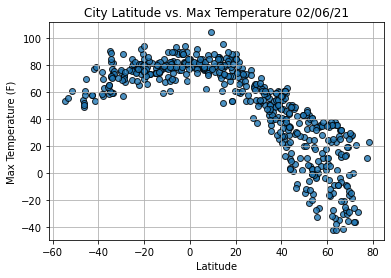

In [162]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

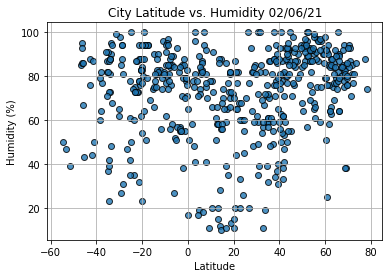

In [163]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

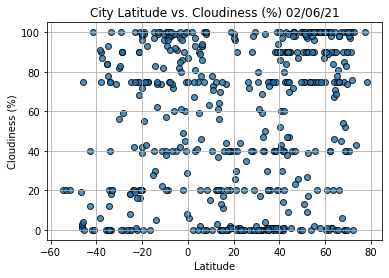

In [164]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

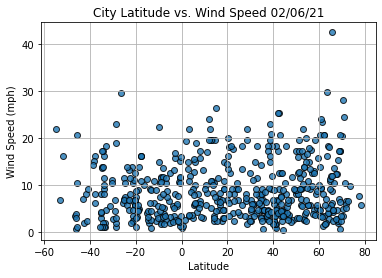

In [165]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()